# Geopandas Tutorial part 1

### I. Installation

Install a geopandas enviroment along with its packages:

```console
C:/User/geopandas> conda create --name geo_env python=3.7 notebook pandas numpy geopandas matplotlib descartes

C:/User/geopandas> conda activate geo_env
```

When you're done with the tutorial. You can go back to the base environment by:


```console
C:/User/geopandas> conda deactivate
```

### II. Data Structures

Before proceeding to the rest of the lecture, you must import needed  packages. Run the cell below.

In [1]:
import pandas as pd
import geopandas
import numpy
import matplotlib.pyplot as plt

A Geoseries is a vector where each entry is a object (shape) corresponding to an observation. Geopandas has three basic classes of geometric objects:

1. Points/ Multi-points
2. Lines / Multi-lines
3. Polygons / Multipolygons

Below, we read a native file included in the geopandas library to show example of a Geoseries. Run the cell below to return a geoseries.

In [2]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres'))
world['geometry']

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

**Question 1:**
    
Return `world` GEOSERIES index 0-4 using `head()` method taught from lecture/notes from Pandas. You can use the empty cell below to enter the code.

A Geodataframe is a pandas' dataframe that contains a Geoseries. It is its most important property. Below, is a Geodataframe, which is like an attribute table from a GIS software, with difference is that the shape is also part of the table as vector of objects. Run the cell below.

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Above is a geodataframe with column `geometry` as the active geoseries. We can run the cell below to plot the geodataframe.

<AxesSubplot:>

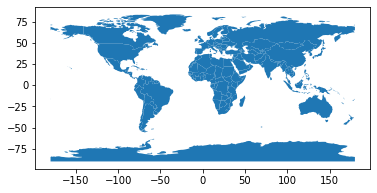

In [4]:
world.plot()

A geodataframe may contain multiple geoseries but sets only one active geoseries. We can create centroids and make it the active geoseries for our `world` dataframe.

/home/nikko/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

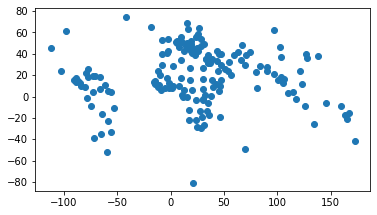

In [5]:
world['centroids'] = world.centroid
world = world.set_geometry('centroids')
world.plot()

**Question 2:**

Use the empty cell below to set back the active geoseries to `geometry`.

In [6]:
world = world.set_geometry('geometry')

You can return more attributes and methods such as `Geodataframe.centroid` from the above example. Here are some of the most important:

Attributes
- `area` : shape of area (using the units of projection)
- `bounds` : tuple of max and min coordinates for each shape
- `total_bounds` : tuple of max and min coordinates for the whole vector
- `geom_type` : type of geometry
- `is_valid` : test if coordinates make a shape that is reasonable geometric shape
- `crs`: return the Geographic coordinate system used by the Geodataframe

Methods
- `distance` : returns Series with minimum distance from each entry to the other
- `centroid` : returns GeoSeries of centroids
- `representative_point()` : returns GeoSeries of points that are guaranteed to be within each geometry. It does NOT return centroids.
- `to_crs()` : change coordinate reference system. See projections
- `plot()` : plot GeoSeries.

**Question 3:**

Use the cell below to return the coordinate system of `world` geodataframe.

In [7]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can use the attribute `area` to compute for the area of each polygon in our active geoseries. Note that the computed area is based on the CRS used.

In [8]:
world = world.set_geometry('geometry')
world['area'] = world.area
world.head()

/home/nikko/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centroids,area
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631),1.639511
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773),76.301964
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117),8.603984
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",POINT (-98.14238 61.46908),1712.995228
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",POINT (-112.59944 45.70563),1122.281921


**Question 4:**

Use all resources (internet) and the cell below to return the row which has the largest area of `world` without changing its CRS.

In [9]:
world.loc[world['area'].idxmax()]

pop_est                                                    4050
continent                                            Antarctica
name                                                 Antarctica
iso_a3                                                      ATA
gdp_md_est                                                  810
geometry      (POLYGON ((-48.66061601418252 -78.047018731598...
centroids          POINT (20.57100056984264 -80.49198288284343)
area                                                    6028.84
Name: 159, dtype: object

**Summary of Data Structures**

1. A Geoseries is a vector of shape objects. Classes can vary in the vector.
2. A Geodataframe is a pandas' dataframe with an active Geoseries.
3. Attributes and methods can be applied to a Geoseries and consequently to a Geodataframe.

### III. Reading and Writing Files

Most shapefiles are compressed into ZIP file. We can directly read a shapefile from it using the example code below.

In [10]:
zipfile = "zip://data/MuniCities.zip"
munies = geopandas.read_file(zipfile)
munies.head(3)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,20,Sallapadan,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81813 17.45325, 120.80331 17.449..."
1,177,PHL,Philippines,1,Abra,21,San Isidro,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.62464 17.44141, 120.62530 17.441..."
2,177,PHL,Philippines,1,Abra,22,San Juan,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81137 17.74075, 120.78275 17.714..."


If we have prior knowledge of the data, we can ignore other fields using the example below. This method can help clean the data.

In [11]:
munies = geopandas.read_file(zipfile, ignore_fields=["ID_0",
                                                     "ISO",
                                                     "ID_1",
                                                     "NAME_0",
                                                     "VARNAME_2",
                                                     "TYPE_2",
                                                     "NAME_1",
                                                     "ID_2",
                                                     "NL_NAME_2",])
munies.head(3)

,NAME_2,ENGTYPE_2,PROVINCE,REGION,geometry
0,Sallapadan,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81813 17.45325, 120.80331 17.449..."
1,San Isidro,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.62464 17.44141, 120.62530 17.441..."
2,San Juan,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81137 17.74075, 120.78275 17.714..."


We can further filter the data using Pandas tricks. The example below limits our geodataframe to Metro Manila areas only.

In [12]:
mmcities = munies[munies['PROVINCE'] == 'Metropolitan Manila']
mmcities.head()

,NAME_2,ENGTYPE_2,PROVINCE,REGION,geometry
990,Kalookan City,City,Metropolitan Manila,Metropolitan Manila,"MULTIPOLYGON (((121.01953 14.68939, 121.01971 ..."
991,Las Piñas,City,Metropolitan Manila,Metropolitan Manila,"MULTIPOLYGON (((120.98571 14.48585, 120.98588 ..."
992,Makati City,City,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.02175 14.57696, 121.02316 14.576..."
993,Malabon,City,Metropolitan Manila,Metropolitan Manila,"POLYGON ((120.93583 14.69478, 120.93593 14.694..."
994,Mandaluyong,City,Metropolitan Manila,Metropolitan Manila,"POLYGON ((121.05737 14.60128, 121.05743 14.601..."


We can save or write `mmcities` to a different shapefile. Run the example below to save mmcities to `data/mmcities/mmcities.shp`. Afterwards, check the directory to see the shapefile. You can now directly load it in GIS software such as QGIS.

In [13]:
mmcities.to_file('data/mmcities/mmcities.shp')

Below is a number of Covid-19 cases in Metro Manila cities. The <a href='https://covid19ph.com/regions/ncr'>data</a> is provided and was last updated in Jul 16, 2020. We can load it using pandas.

In [14]:
mmcovid = pd.read_csv('data/mmcovid.csv')
mmcovid.head()

,City,Cases,Active,Deaths,Recovered
0,Quezon City,4736,1886,263,2587
1,Manila,3639,1351,188,2100
2,Parañaque,1851,780,71,1000
3,Taguig,1677,1044,23,610
4,Kalookan City,1611,571,88,952


**Question 5:**

Suppose we want to create a GeoJSON of Covid-19 cases in Metro Manila, we can merge the mmcities and mmcovid to make a new geodataframe. Using all resources and <a href='https://geopandas.org/io.html#writing-spatial-data'>geopandas write</a>, 
1. merge mmcities and mmcovid to mmdf on NAME_2 and City
2. Drop NAME_2, ENGTYPE_2, REGION in mmdf
3. Rename PROVINCE to Province
4. Save the resulting geodataframe into a GeoJSON: `data/mmdf.geojson`

Use the cell below to show all procedures/codes.

In [15]:
mm_df = pd.merge(mmcities, mmcovid, how='inner',
                left_on='NAME_2',
                right_on='City')

mm_df = mm_df.drop(['NAME_2', 'ENGTYPE_2', 'REGION'], axis=1)
mm_df = mm_df.rename(columns={'PROVINCE':'Province'})
mm_df = mm_df[['City', 'Province', 'Cases', 'Active', 'Deaths', 'Recovered', 'geometry']]
mm_df.to_file('data/mmcities/mmcovidshp.shp')

**Summary of Reading and Writting Files**
1. You can read directly through a ZIP file. You can further clean the geodataframe by ignoring fields upon reading.
2. There are many options such as Shape and GeoJSON for writing a geodataframe.
3. A written/saved geodataframe into Shape or any format can be loaded in GIS software.

### IV. Making Maps

Mapping in Geopandas is as easy using the `plot()` method on a GeoSeries or GeoDataFrame. We can load an example data.

<AxesSubplot:>

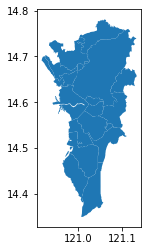

In [16]:
zipfile2 = "zip://data/mmcovidshp.zip"
mmcovid_gdf = geopandas.read_file(zipfile2)
mmcovid_gdf.plot()

Resizing the image.

<AxesSubplot:>

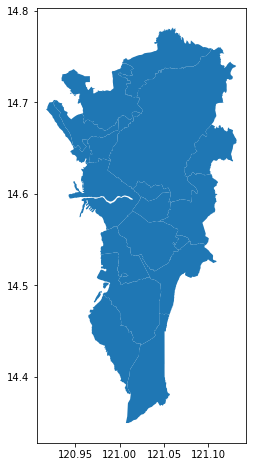

In [17]:
mmcovid_gdf.plot(figsize=(6, 8))

We can normalize the number of cases to create a Choropleth map to compare the severity of Covid-19 hit in Metro Manila.

<AxesSubplot:>

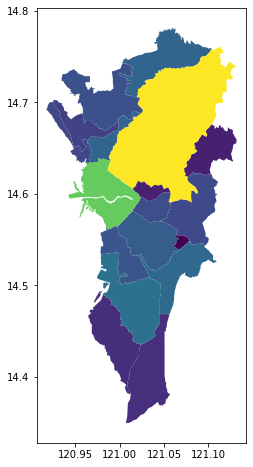

In [18]:
mmcovid_gdf['normalized'] = (mmcovid_gdf['Cases'] - 
                            mmcovid_gdf['Cases'].min()
                           ) / (mmcovid_gdf['Cases'].max() -
                               mmcovid_gdf['Cases'].min())

mmcovid_gdf.plot(column='normalized', figsize=(6, 8))

We can add a legend to our map.

<AxesSubplot:>

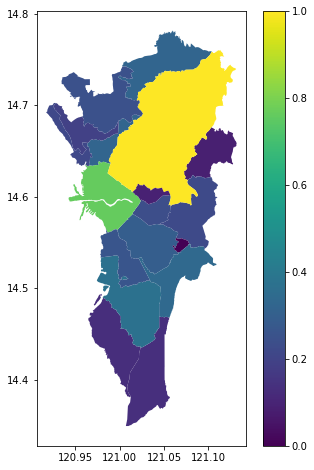

In [19]:
mmcovid_gdf.plot(column='normalized', figsize=(6, 8), legend=True)

We can change the color ramp of the map.

<AxesSubplot:>

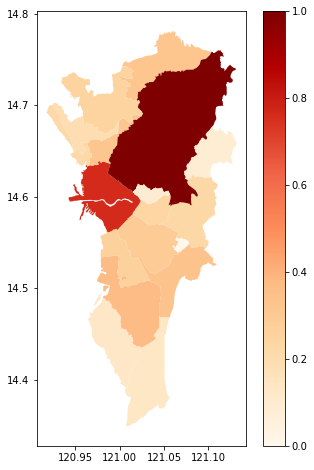

In [20]:
mmcovid_gdf.plot(column='normalized', figsize=(6, 8), 
                 legend=True, cmap='OrRd')

We can map multiple layers. Suppose we want to show the centroids of each city on the map. We can copy the original geodataframe and set a different active geoseries. The layers follow an order. The first layer being plotted will be on lowest part. Next layer will be overlayed above the previous plotted layer.

/home/nikko/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


<AxesSubplot:>

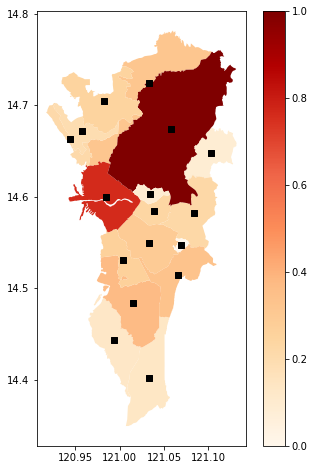

In [21]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_aspect('equal')
mmcovid_centroids_gdf = mmcovid_gdf.copy()

mmcovid_centroids_gdf['centroids'] = mmcovid_centroids_gdf.centroid
mmcovid_centroids_gdf = mmcovid_centroids_gdf.set_geometry('centroids')


mmcovid_gdf.plot(ax=ax, column='normalized', 
                 legend=True, cmap='OrRd')
mmcovid_centroids_gdf.plot(ax=ax, color='black', marker='s')

Below are some of the referral hospitals in Metro Manila. Run the cell below to show them. Use this for the next question/activity.

In [22]:
geojson1 = "data/mmreferralhospitals.geojson"
filename1 = open(geojson1)
mmhospitals = geopandas.read_file(filename1)
mmhospitals.head()

,Hospital,x,y,geometry
0,Philippine General Hospital (PGH),120.985556,14.577777,POINT (120.98556 14.57778)
1,Tondo Medical Center,120.963056,14.634999,POINT (120.96306 14.63500)
2,National Children's Hospital,121.020832,14.620003,POINT (121.02083 14.62000)
3,Philippine Orthopedic Center,121.003056,14.627500,POINT (121.00306 14.62750)
4,Dr. Jose Fabella Memorial Hospital,120.984168,14.606109,POINT (120.98417 14.60611)


**Question 6**

Using all resources, mmcovid_gdf, mmhospitals and the empty cell below,

1. Compute the normalized 'Recovered' Cases in mmcovid_gdf
2. Make a double layered map
- Use figsize=(6, 8) to resize image
- Use the new computed column to plot the new mmcovid_gdf
- Set cmap='Greens'
- Include a legend
- Plot mmhospitals overlayed above mmcovid_gdf
- Use marker='+' for mmhospitals

<AxesSubplot:>

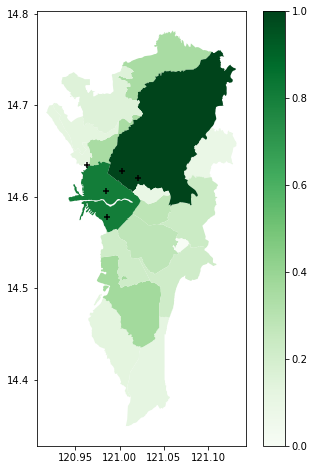

In [32]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.set_aspect('equal')

mmcovid_gdf['normalized_recovery'] = (mmcovid_gdf['Recovered'] - 
                            mmcovid_gdf['Recovered'].min()
                           ) / (mmcovid_gdf['Recovered'].max() -
                               mmcovid_gdf['Recovered'].min())

mmcovid_gdf.plot(ax=ax, column='normalized_recovery', 
                 legend=True, cmap='Greens')
mmhospitals.plot(ax=ax, color='black', marker='+')

**Summary of Making Maps**

1. Using plot() method, we can display our GeoSeries or GeoDataFrame.
2. There are certain ways to manipulate our map such as resizing, adding legend and choosing different color scheme.
3. We can create multiple layers on the map provided they have a GeoSeries, which means only vectors are allowed (no raster).

### V. Geometric Manipulations

Geopandas makes use of all the tools for geometric manipulations using the <a href='https://shapely.readthedocs.io/en/latest/manual.html'>shapely library</a>. Let us load Metro Manila road vector.

<AxesSubplot:>

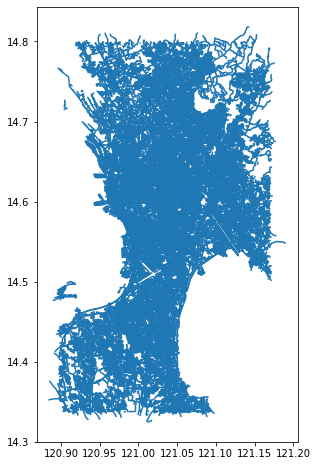

In [24]:
zipfile3 = "zip://data/roads_MM.zip"
mmroads = geopandas.read_file(zipfile3)
mmroads.plot(figsize=(6, 8))

Constructive methods are applied to objects e.g. polygon to manipulate the representation of the object. We can use buffer to lines to enlarge the coverage area of our line objects.

/home/nikko/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<AxesSubplot:title={'center':'buffered'}>

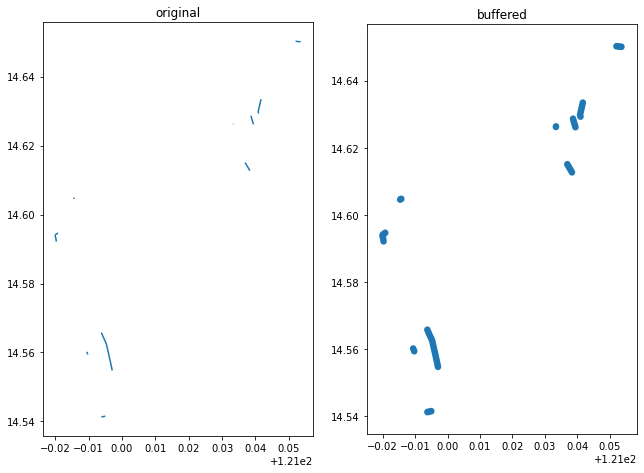

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(6, 8))
plt.subplots_adjust(right=1.5)
ax[0].set_title("original")
ax[1].set_title("buffered")
mmroads[0:10].plot(ax=ax[0])
mmroads[0:10].buffer(0.001).plot(ax=ax[1])

Meanwhile, Affine transformation geometrically manipulate the orientation of our objects. Below, we can rotate our lines using an angle as argument. In the example below we rotate the lines counter clockwise by 45 degrees. We can use -45 to make it clockwise.

<AxesSubplot:title={'center':'-45 deg'}>

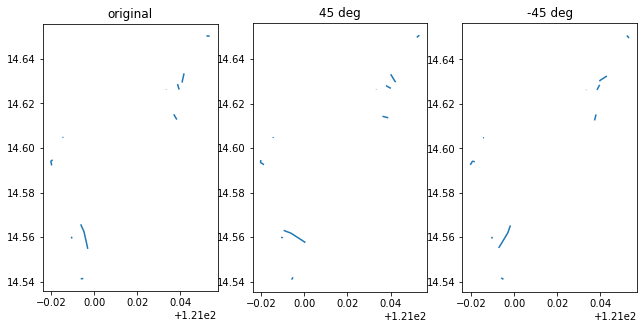

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(6, 8))
plt.subplots_adjust(right=1.5)
ax[0].set_title("original")
ax[1].set_title("45 deg")
ax[2].set_title("-45 deg")
mmroads[0:10].plot(ax=ax[0])
mmroads[0:10].rotate(45).plot(ax=ax[1])
mmroads[0:10].rotate(-45).plot(ax=ax[2])

**Question 7**

Use <a href='https://geopandas.org/geometric_manipulations.html#constructive-methods'>geometric manipulation</a> to only show the boundary of mmcovid_gdf. Use the empty cell below.

<AxesSubplot:>

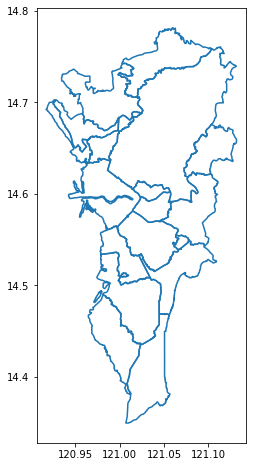

In [33]:
mmcovid_gdf.boundary.plot(figsize=(6, 8))

**Summary of Geometric Manipulation**

1. There are at least two types of geometric manipulation, constructive methods and affine transformation. They are both use to alter the visual representation of the vector objects.

### VI. Set Operations with Overlay

When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections, unions, and differences. 

![image info](./data/overlay_operations.png)

<a href='https://geopandas.org/set_operations.html#set-operations-with-overlay'>source</a>

We can set mmcovid_gdf.boundary as the active geometry and mmroads to show examples.

<AxesSubplot:title={'center':'mmroads'}>

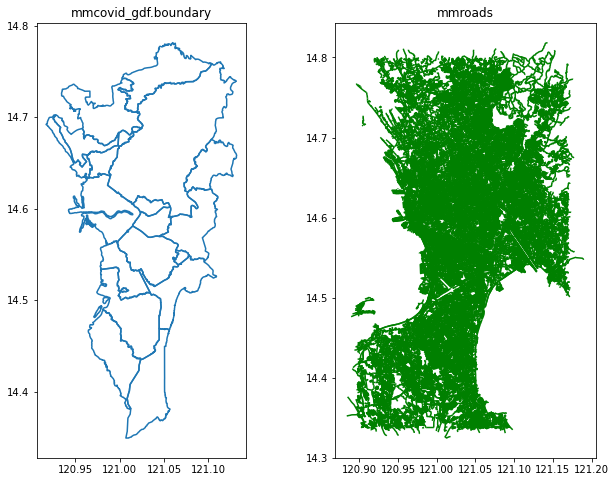

In [44]:
mmboundary = mmcovid_gdf.copy()
mmboundary['boundary'] = mmboundary.boundary
mmboundary = mmboundary.set_geometry('boundary')

fig, ax = plt.subplots(1, 2, figsize=(6, 8))
plt.subplots_adjust(right=1.5)
ax[0].set_title("mmcovid_gdf.boundary")
ax[1].set_title("mmroads")
mmboundary.plot(ax=ax[0])
mmroads.plot(ax=ax[1], color='green')

We can illustrate the different overlay modes using the above example. The overlay function will determine the set of all individual geometries from overlaying the two input GeoDataFrames. This result covers the area covered by the two input GeoDataFrames, and also preserves all unique regions defined by the combined boundaries of the two GeoDataFrames.
<a href='https://geopandas.org/set_operations.html#the-different-overlay-operations'>source</a>

In [45]:
overlay_union = geopandas.overlay(mmboundary, mmroads,
                                 how='union')

ax = overlay_union.plot(alpha=0.5, cmap='tab10', figsize=(6, 8))
mmboundary.plot(ax=ax, facecolor='none', edgecolor='blue')
mmroads.plot(ax=ax, facecolor='none', edgecolor='green')

In [71]:
from geopandas.tools import overlay
overlay_intersection = overlay(mmcovid_gdf, mmroads[0:10],
                                 how='intersection')

overlay_intersection.plot(figsize=(6, 8))
#mmboundary.plot(ax=ax, facecolor='none', edgecolor='blue')
#mmroads.plot(ax=ax, facecolor='none', edgecolor='green')

/home/nikko/anaconda3/envs/geo_env/lib/python3.7/site-packages/geopandas/plotting.py:607: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


<AxesSubplot:>

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff3e8860170> (for post_execute):


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

In [69]:
mmroads.is_empty

0        False
1        False
2        False
3        False
4        False
         ...  
94464    False
94465    False
94466    False
94467    False
94468    False
Length: 94469, dtype: bool